## EDA on US_Accidents(3 million dataset)

## Link of used DataSet:
https://www.kaggle.com/sobhanmoosavi/us-accidents
- Contains Data for 49 States of US
- Missing relevant Data for: New York

## Data Preparation & Cleaning
1. Load the file using pandas
2. Look for informations in dataframs and columns
3. Fixing any missing or incorrect values


In [25]:
import pandas as pd
import numpy as np

In [26]:
data_fname = "C:\\Users\\rahul\\US_Accidents_Dataset\\US_Accidents_Dec20_Updated.csv"

In [27]:
df = pd.read_csv(data_fname)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [29]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [30]:
# Check for no of Numeric columns in the DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float64', 'float32']

numerics_df = df.select_dtypes(include = numerics)

In [31]:
len(numerics_df.columns)

14

- No. of Total Columns = 47
- No. of Numeric columns = 14 

- Finding no of missing values per column in pandas df

In [32]:
df.isna().sum().sort_values(ascending = False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Sunrise_Sunset               110
Civil_Twilight               110
Nautical_Twilight            110
Astronomical_Twilight        110
City                         108
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station   

- Percentage of missing values per column:

In [33]:
missing_percent = df.isna().sum().sort_values(ascending = False)/ len(df)
missing_percent

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
Country                  0.000000
Junction                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop          

In [34]:
# Looking for more no of missing data:
missing_percent[missing_percent != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
dtype: float64

<AxesSubplot:>

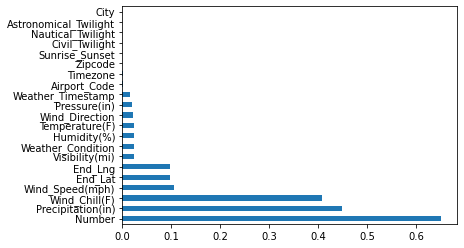

In [35]:
# Plotting on graph
missing_percent[missing_percent != 0].plot(kind='barh')

- Note:
- Remove columns that has missing values more than 70% of the data: as it might not be useful for analysis

## Exploratory Analysis & Visualisation

General Analysis on Columns: 
1. City
2. Start Time
3. Start lat, End lat
4. Temperature
5. Weather Conditions
6. Wind_Speed
7. States


## 1. City

In [36]:
cities = df.City.unique()
len(cities)

11790

In [37]:
cities_by_accident = df.City.value_counts()

In [39]:
cities_by_accident[:100]

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Sarasota            4336
Pensacola           4287
West Palm Beach     4224
Baltimore           4175
Hollywood           4175
Name: City, Length: 100, dtype: int64

In [41]:
'New York' in df.City

False

In [42]:
len(df.City[df.City == 'New York'])

7328

- There are only 7.3 k reported accidents for New York City

In [43]:
# Importing seaborn for plotting graphs
import seaborn as sns
sns.set_style('darkgrid')

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

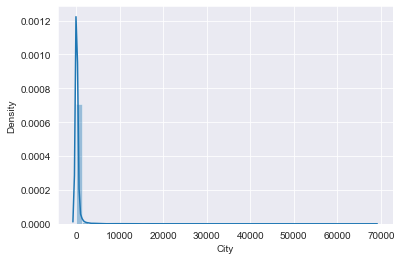

In [44]:
sns.distplot(cities_by_accident)

- Notes to be made: 
- Most cities have less than 2000 accidents
- No. of accidents for cities are higher than 10k for very less no of cities(Density close to 0)

In [45]:
high_acc_cities = cities_by_accident[cities_by_accident >= 1000]
low_acc_cities =  cities_by_accident[cities_by_accident < 1000]

In [46]:
len(cities)

11790

In [47]:
len(high_acc_cities)

513

In [48]:
len(low_acc_cities)

11276

As We see: 
1. No. of cities with accidents more than 1k = 513
2. No. of cities with accident less than 1k = 11,276
3. Total no. of cities = 11,790

<AxesSubplot:xlabel='City', ylabel='Count'>

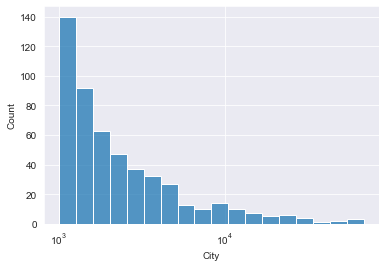

In [49]:
sns.histplot(high_acc_cities, log_scale = True)

<AxesSubplot:xlabel='City', ylabel='Count'>

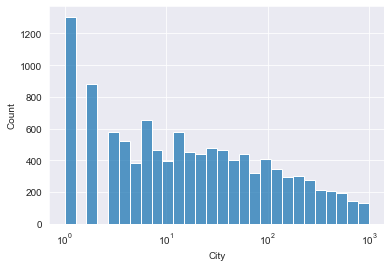

In [50]:
sns.histplot(low_acc_cities, log_scale = True)

In [51]:
cities_by_accident[cities_by_accident <= 1]

Rheiderland               1
Sac City                  1
Lindenwood                1
Township 6 Clear Creek    1
Bankston                  1
                         ..
Perrinton                 1
Holdingford               1
De Graff                  1
Thawville                 1
Saint Leonard             1
Name: City, Length: 1306, dtype: int64

- 1306 cities have less than or equal to 1 accident

In [52]:
cities_by_accident[cities_by_accident <= 10]

Topsham           10
Seiad Valley      10
Deer Trail        10
Abbotsford        10
New Enterprise    10
                  ..
Perrinton          1
Holdingford        1
De Graff           1
Thawville          1
Saint Leonard      1
Name: City, Length: 5005, dtype: int64

- 5005 cities have less than or equal to 10 accidents

## 2. Start Time:

In [53]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

- Setting Start Time to pandas Date Timestamp form

In [54]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [55]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [56]:
# To get hours from the time stamp of ech start time:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

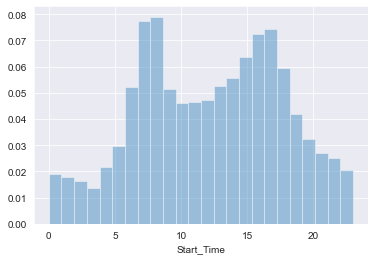

In [57]:
# Plotting the hours in histogram to get the percent of accidents in hours of day:
sns.distplot(df.Start_Time.dt.hour, norm_hist=True, kde = False, bins = 24)

- Note to take:
- A high percentage of accidents are between 6a.m to 10 a.m(probably people are in hurry to get to work)
- Maximum no of accidents are at 8 a.m 
- The next time for higher percentage of accidents is b/w 3:00 pm to 6:00 pm
- No. of Accidents starts decreasing from 1800 hrs

Analysis Based on days of week:

In [58]:
df.Start_Time.dt.dayofweek

0          1
1          0
2          6
3          1
4          2
          ..
2906605    3
2906606    3
2906607    0
2906608    6
2906609    0
Name: Start_Time, Length: 2906610, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

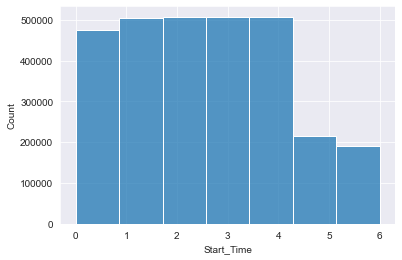

In [59]:
# Monday = 0 to Sunday = 6
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7)

The no of accidents on week days are almost constant than on weekends

- Is the distribution of Hours for accidents, the same for Weekends as those on weekdays?

In [60]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
wed_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]


c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

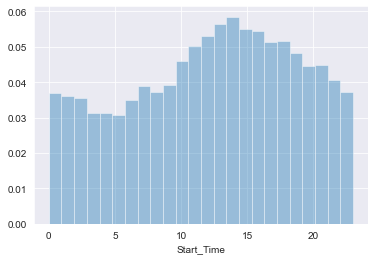

In [61]:
# Plot for hours on Sunday
sns.distplot(sunday_start_time.dt.hour,norm_hist = True, bins = 24, kde= False)

<AxesSubplot:xlabel='Start_Time'>

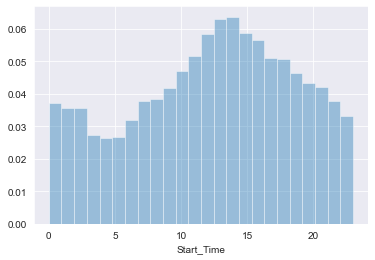

In [62]:
# Plot for hours on Saturday
sns.distplot(saturday_start_time.dt.hour,norm_hist = True, bins = 24, kde = False)


<AxesSubplot:xlabel='Start_Time'>

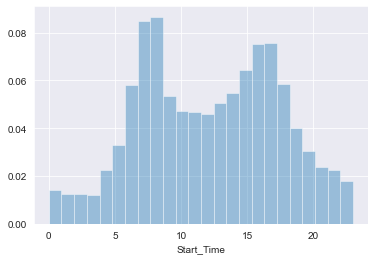

In [63]:
# For monday
sns.distplot(monday_start_time.dt.hour, norm_hist = True, kde = False, bins = 24)

<AxesSubplot:xlabel='Start_Time'>

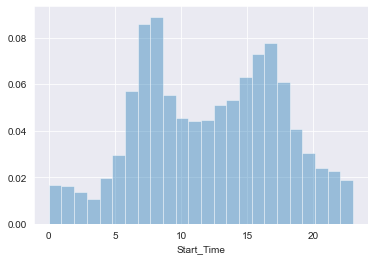

In [64]:
# For Wednesday
sns.distplot(wed_start_time.dt.hour, bins = 24,kde = False, norm_hist = True)

- On Weekends, the peak of percent of accidents is higher during afternoon(1 pm - 2p.m) unlike for weekdays.

- Checking for months

<AxesSubplot:xlabel='Start_Time'>

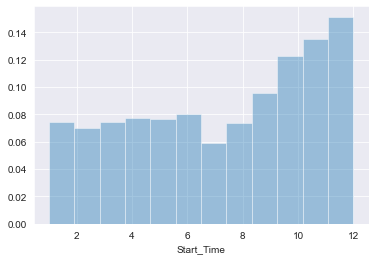

In [65]:
sns.distplot(df.Start_Time.dt.month, norm_hist = True, kde= False, bins =12)

Why is there more trend for accidents during winters?
- Looks like many data for 2016 is missing, and also for 2017

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

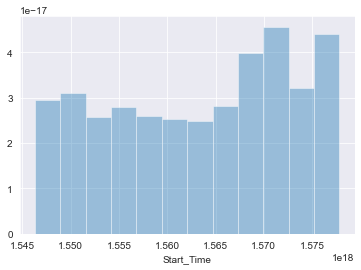

In [66]:
# Looking for each years:
data_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]
sns.distplot(data_2019, norm_hist = True, kde= False, bins =12)


c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

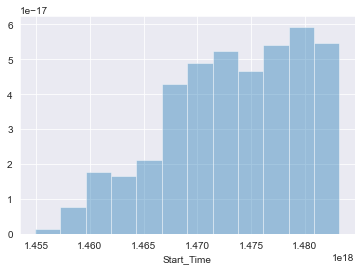

In [67]:
# 2016
data_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.distplot(data_2016, norm_hist = True, kde= False, bins =12)

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

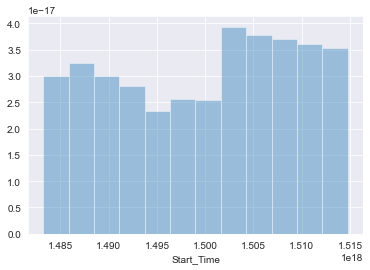

In [68]:
# 2017
data_2017 = df.Start_Time[df.Start_Time.dt.year == 2017]
sns.distplot(data_2017, norm_hist = True, kde= False, bins =12)

In [69]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## 3. Start_Lat & Start_Lng:

In [70]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [71]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

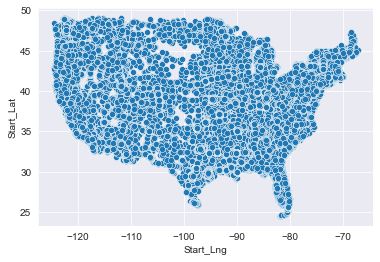

In [72]:
sns.scatterplot(x= df.Start_Lng, y = df.Start_Lat)

- Let's Try to put it in a map or maybe draw a heatmap from the data:

In [73]:
# Taking sampl of 1% data from data frame
Sam_df = df.sample(int(0.001*len(df)))

In [74]:
Lat_Lon_pairs = list(zip(list(Sam_df.Start_Lat),list(Sam_df.Start_Lng)))

In [75]:
Lat_Lon_pairs

[(33.928986, -118.230331),
 (39.857208, -86.26747900000001),
 (26.758869, -80.086372),
 (34.88472, -86.73898299999999),
 (33.809090000000005, -117.85302),
 (37.492233, -120.757764),
 (29.186285, -82.184608),
 (32.887221999999994, -96.782753),
 (42.26651, -83.23139),
 (35.214645000000004, -80.83000899999999),
 (33.710772, -117.960733),
 (29.330193, -98.541206),
 (38.990618, -77.03628),
 (39.704037, -105.25083899999998),
 (34.051362, -118.006079),
 (32.485928, -93.788673),
 (32.241627, -110.873116),
 (41.625996, -87.69162),
 (42.55452, -70.88163),
 (33.533297999999995, -86.567429),
 (34.153766999999995, -118.275389),
 (35.756924, -78.665741),
 (28.61807, -81.53662),
 (29.969833, -95.534584),
 (34.06446, -118.00388),
 (39.284639, -76.963286),
 (41.53509, -72.765766),
 (38.34058, -121.3345),
 (39.92707, -82.68047),
 (29.720085, -95.624077),
 (35.406220000000005, -97.54795),
 (34.05249, -118.226667),
 (41.055183, -111.96108),
 (36.861944, -121.579444),
 (42.924073, -83.625936),
 (30.38376, 

In [76]:
import folium
from folium.plugins import HeatMap

In [77]:
map_it = folium.Map()
HeatMap(Lat_Lon_pairs).add_to(map_it)
map_it

Note:
- More No. of accidents are seen to be occuring at coastal areas than on midland
- Population of coastal areas are more than mid land maybe

## 4. Temperature

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)'>

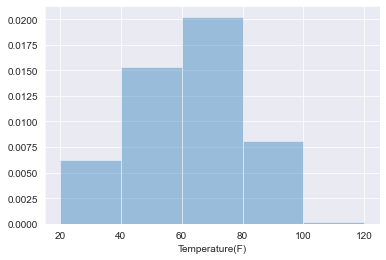

In [78]:
sns.distplot(df['Temperature(F)'], norm_hist= True, kde = False,bins = [20,40,60,80,100,120])

This is plotted in Temp(F)

In [79]:
temp_deg_C = (df['Temperature(F)']-32)/1.8
temp_deg_C

0          24.444444
1          24.444444
2          10.555556
3          12.000000
4          29.000000
             ...    
2906605    29.000000
2906606     8.277778
2906607    24.444444
2906608    -2.777778
2906609    10.611111
Name: Temperature(F), Length: 2906610, dtype: float64

Text(0.5, 0, 'Temperature(c)')

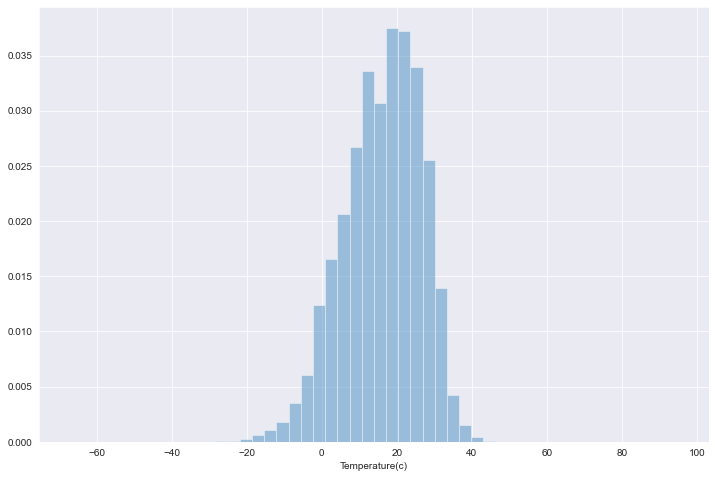

In [98]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 8)
p = sns.distplot(temp_deg_C, norm_hist= True, kde = False)
p.set_xlabel('Temperature(c)')

- Looks like the max no. of accidents are at the temperature between 15-20 deg C which is kinda normal temperature.

Checking for Windspeed:

<AxesSubplot:xlabel='Wind_Speed(mph)', ylabel='Density'>

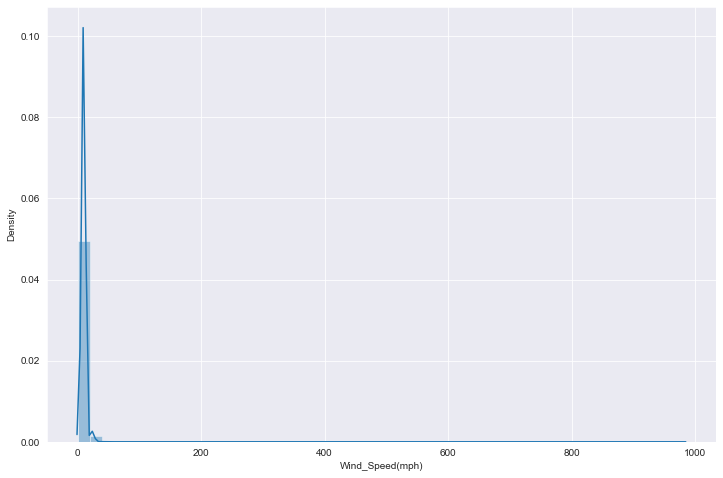

In [81]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.distplot(df['Wind_Speed(mph)'], norm_hist = True)

<AxesSubplot:xlabel='Temperature(F)', ylabel='Wind_Speed(mph)'>

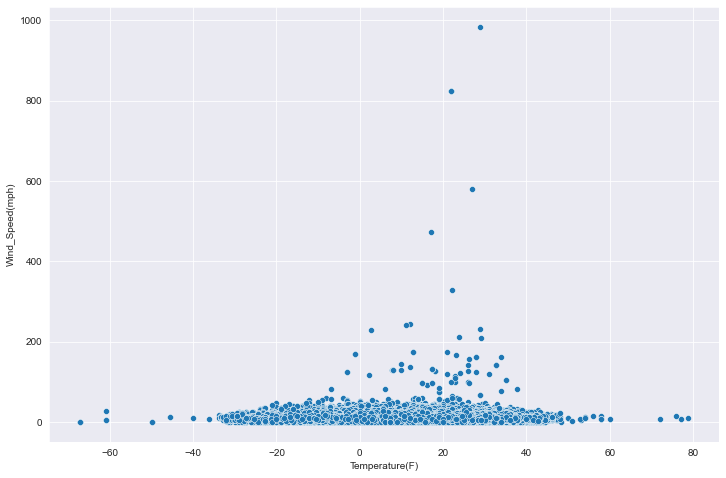

In [82]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x= temp_deg_C,y = df['Wind_Speed(mph)'] )

- It can be seen that no of accidents are not much dependent on windspeed
- Though there are some accidents at higher wind speeds, which can be cause as people might be affected by winds and got engaged in accidents.
- The Accidents are evenly spread for the Temperature change too with most of them being in range -40 C to 40 C

In [83]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [84]:
df.State.value_counts()

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
MA     25121
IN     24993
CT     24054
KY     15296
WI     14669
NE     13678
IA      9492
RI      8314
NV      7812
KS      7444
NH      6250
MS      5419
DC      5201
AR      4726
DE      4625
ID      4165
NM      3973
WV      3421
MT      3333
ME      2266
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

- The most number of accidents are in the State(Top 5) :
1. California
2. Florida
3. Texas
4. New York
5. North Carolina

In [85]:
df_by_state = df.State.value_counts()

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State'>

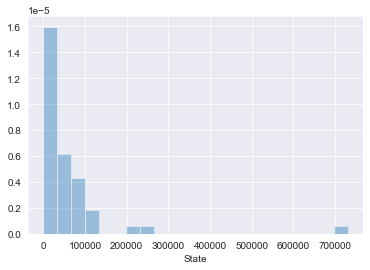

In [86]:
sns.distplot(df_by_state, norm_hist = True, kde = False)

- Seeing the number of States having more than 50k accidents;

In [87]:
state_high_acc = df.State.value_counts()[df.State.value_counts() >= 50000]

In [99]:
len(state_high_acc)

18

In [100]:
state_low_acc = df.State.value_counts()[df.State.value_counts() < 50000]
len(state_low_acc)

31

## Ask & Answer Questions:

1. Are there more accidents in warmer or colder areas?

- Looks like the accidents are not much dependent on temperature, since data shows evenly distributed plot.

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Temperature(c)')

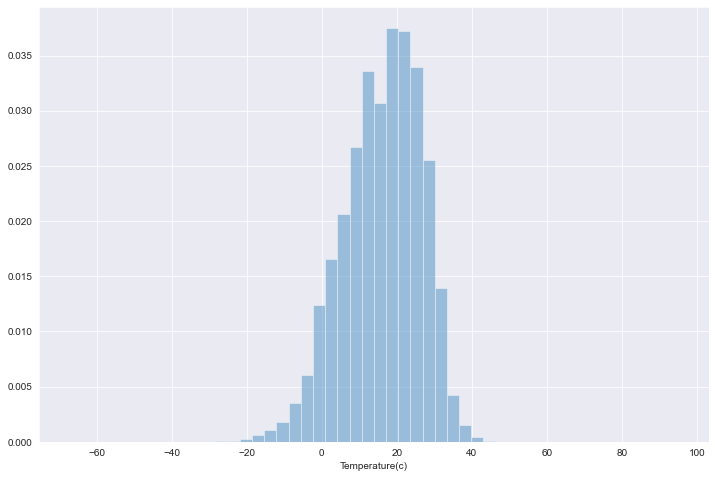

In [102]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 8)
p = sns.distplot(temp_deg_C, norm_hist= True, kde = False)
p.set_xlabel('Temperature(c)')

2. Why is NewYork not in list of most no of accidents among cities, despite of having the highest population?

- Data For New York is very less as available in  dataset(7.3 k). Maybe most of the data is missing or accidents are not reported.

In [103]:
len(df.City[df.City == 'New York'])

7328

3. What time of the day is the accidents more frequent in?

- A high percentage of accidents are between 6a.m to 10 a.m(probably people are in hurry to get to work)
- Maximum no of accidents are at 8 a.m
- The next time for higher percentage of accidents is b/w 3:00 pm to 6:00 pm
- No. of Accidents starts decreasing from 6:00 pm.

<AxesSubplot:xlabel='Start_Time'>

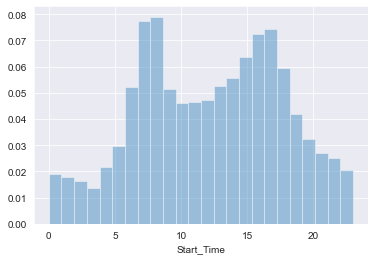

In [104]:
# Plotting the hours in histogram to get the percent of accidents in hours of day:
sns.distplot(df.Start_Time.dt.hour, norm_hist=True, kde = False, bins = 24)

4.  Which Days of week have most accident?

- The no of accidents on week days are almost constant but it gets decreased at weekends.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

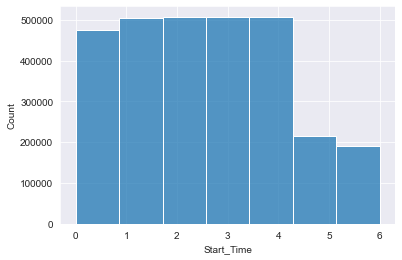

In [105]:
# Monday = 0 to Sunday = 6
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7)

5. Which months of year have most accidents?

- Data Shows wintery months have more no of accidents.(Itt is kind of irrelevant: Look in Insights)

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

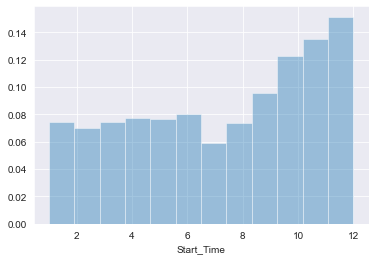

In [106]:
sns.distplot(df.Start_Time.dt.month, norm_hist = True, kde= False, bins =12)

5. Do temperature & windspeed effect having accidents?

- No, the graph is uniformly distributed in scatterplots, having a few outliers, which shows there maybe quite a few accidents occur due to people travelling out at higher windspeeds.

<AxesSubplot:xlabel='Temperature(F)', ylabel='Wind_Speed(mph)'>

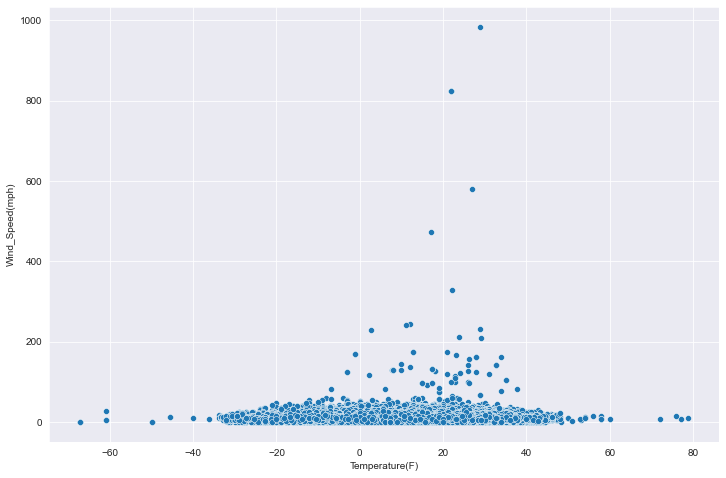

In [107]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x= temp_deg_C,y = df['Wind_Speed(mph)'] )

6. Do having more population in an area results in more accidents?

- The heatmap shows most accidents are among coastal areas than on midland. Also the populaton at coastal regions are relatively higher. So, according to data, yes, having more population in an area results in more accidents

In [109]:
map_it = folium.Map()
HeatMap(Lat_Lon_pairs).add_to(map_it)
map_it

## Summary & Conclusions

## Insights:
- No. of Rows = 2906610 & Columns = 47
- Column Types are distributed as : bool(13), float64(13), int64(1), object(20)
## By columns:
1. Cities:
- There are only 7.3 k reported accidents for New York City
- Looks like most of thr data for NYC is missing or accidents aren't reported.
- Most cities have less than 2000 accidents
- More than 10k accidents per city have very less no of cities(Density close to 0). i.e, most cities have less than 2000 accidents
- No. of cities with accidents more than 1k = 513
- No. of cities with accident less than 1k = 11,276
- Total no. of cities = 11,790
- 1306 cities have less than or equal to 1 accident
- 5005 cities have less than or equal to 10 accidents
- the No. of accidents per city decreases exponentially
2. Start_Time:
- A high percentage of accidents are between 6a.m to 10 a.m(probably people are in hurry to get to work)
- Maximum no of accidents are at 8 a.m
- The next time for higher percentage of accidents is b/w 3:00 pm to 6:00 pm
- No. of Accidents starts decreasing from 6:00 pm.
- The no of accidents on week days are almost constant but it gets decreased at weekends.
- On Weekends, the peak of percent of accidents is higher during afternoon(1 pm - 2p.m) unlike for weekdays.
- The data for months show that: The wintery months have more trends for accidents. Do you think its relevant?
- Looks like many data for 2016 is missing, and also for 2017.
- Other than that, for moths in a year, trend is more like constant.
3. Start_Lat & Start_Lng:
- More No. of accidents are seen to be occuring at coastal areas than on midland
- Population of coastal areas are more than mid land maybe
- The heat map is drawn by taking 1% of the total data, which is relevant to show details.
4. Temperature:
- Temperature curve is normally distributed between -40 to 40 deg celcius
- Looks like the maximum no. of accidents are at the temperature between 15-20 deg celcius or 60-80 Degree F which is kinda normal temperature.
- The Temperature doesn't affect the happening of accidents as shown by the data.
5. Wind_Speed:
- It can be seen that no of accidents are not much dependent on windspeed
- Though there are some accidents at higher wind speeds, which can be cause as people might be affected by winds and got engaged in accidents.
6. States:
- The most number of accidents are in the State(Top 5) :
- California
- Florida
- Texas
- New York
- North Carolina
Texas has more population than Florida, but the number of accidents show opposite trend.
- States having more than 50k accidents are only 18
- States having less than 50k accidents are 31
